## Phase 3 Project Submission

 - Student name : Eric W. Njeru
 - Student Pace : Part time
 - Scheduled revie date : 23rd October 2023
 - Instructor : Samuel Karu
 
 
 # TANZANIA WATER WELL ANALYSIS

### Project Overview
Tanzania, a developing country with a population of over 67 million(according to https://www.worldometers.info/world-population/tanzania-population/), faces significant challenges in providing clean water to its citizens. Many existing water wells are either in need of repair or have become non-functional hence many families have a challenge accessing this basic need. This project aims to address this issue by developing a predictive model to classify the condition of water wells.

### Project Objective:
The primary objective of this project is to build a classifier that can predict the condition of water wells based on relevant data such as the type of pump, installation date, and other pertinent factors. The classifier will be designed with the primary aim of aiding:

a. NGOs: Assist non-governmental organizations (NGOs) in identifying wells that require repair or maintenance, enabling them to allocate their resources efficiently and ensure a sustainable supply of clean water.

b. Government of Tanzania: Provide insights into the patterns and factors contributing to non-functional wells, enabling evidence-based decision-making for the construction of new wells. This may involve converting the ternary classification problem into a binary one for simplicity.

### Methodology:
The project will employ a data-driven approach, using historical well data, to train and test a machine learning classifier. The methodology will involve data preprocessing, feature engineering, model selection, and evaluation. Additionally, geospatial analysis may be used to incorporate the geographical aspect of well locations.

In [1]:
#Import Necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier



In [2]:
#Read the Training set values dataset to understand its contents

Trng_val_Df = pd.read_csv('Data/Trasining set values.csv')
Trng_val_Df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
#Describe the info of the data frame 
Trng_val_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [4]:
#Open and read the Training set label dataset to get its insights

Trng_st_Df = pd.read_csv('Data/Training set Label.csv')
Trng_st_Df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
#Get the info of the training label dataframe

Trng_st_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


Both the Training set label and Training set values have 59400 Rows. However the Training set values has 40 columns while the Training  set label has 2 rows. The two datasets have an id column that seems similar and can be used to merge the two sets.

In [6]:
# Merge the two data frames into one on the id column

Training_df = pd.merge(Trng_val_Df, Trng_st_Df, on='id')
Training_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


### Understanding and cleaning our data
Understanding what each columns represents is essential. This will enable make decisions on the importance of the column and its effect on our dependent variable.  


	
- 1.date_recorded	            -The date the row was entered
- 2	funder	                    -Who funded the well
- 3	gps_height	                -Altitude of the well
- 4	installer	                -Organization that installed the well
- 5	longitude	                -GPS coordinate
- 6	latitude	                -GPS coordinate
- 7	wpt_name	                -Name of the waterpoint if there is one
- 8	num_private	                -Number of private waterpoints
- 9	basin	                    -Geographic water basin
- 10	subvillage	            -Geographic location
- 11	region	                -Geographic location
- 12	region_code	            -Geographic location
- 13	district_code        	-Geographic location
- 14	lga	                    -Geographic location
- 15	ward	                -Geographic location
- 16	population	            -Population utilizing the well
- 17	public_meeting	        -True/False
- 18	recorded_by	            -Group entering this row of data
- 19	scheme_management	    -Management of the waterpoint
- 20	scheme_name	            -Management of the waterpoint
- 21	permit	                -If the waterpoint is permitted
- 22	construction_year	    -Year the waterpoint was constructed
- 23	extraction_type	        -The kind of extraction the waterpoint uses
- 24	extraction_type_group	-The kind of extraction the waterpoint uses
- 25	extraction_type_class	-The kind of extraction the waterpoint uses
- 26	management	            -How the waterpoint is managed
- 27	management_group    	-How the waterpoint is managed
- 28	payment	                -What the water costs
- 29	payment_type	        -How the water is paid
- 30	water_quality	        -The quality of the water
- 31	quality_group	        -The quality of the water
- 32	quantity	            -The quantity of water
- 33	quantity_group      	-The quantity of water
- 34	source	                -The source of the water
- 35	source_type	            -The source of the water
- 36	source_class	        -The source of the water
- 37	waterpoint_type     	-The kind of waterpoint
- 38	waterpoint_type_group	-The kind of waterpoint
- 39.   status_group	        -Condition of the well

### Data Preparation
Based on the above descriptions of the data set, I picked on some columns that I felt would be of importance to my analysis and would have an impact the dependent variable.

I then grouped them into categorical and numerical columns. The numerical columns selected are:

- gps_height
- population
- longitude
- latitude
- construction_year

The categorical columns are:

- basin
- region
- extraction_type_class
- management_group
- payment
- water_quality
- quantity_group
- source_type
- source_class
- water_point type
- region
- status_group


In [7]:
# Creating a data frame from the secelcted columns
New_df = Training_df.loc[:,[
    'gps_height',
    'population',
    'longitude',
    'latitude',
    'construction_year',
    'basin',
    'region',
    'extraction_type_class',
    'management_group',
    'payment',
    'water_quality',
    'quantity_group',
    'source_type',
    'source_class',
    'waterpoint_type',
    'status_group',
]]
New_df.head()

,gps_height,population,longitude,latitude,construction_year,basin,region,extraction_type_class,management_group,payment,water_quality,quantity_group,source_type,source_class,waterpoint_type,status_group
0,1390,109,34.938093,-9.856322,1999,Lake Nyasa,Iringa,gravity,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional
1,1399,280,34.698766,-2.147466,2010,Lake Victoria,Mara,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,686,250,37.460664,-3.821329,2009,Pangani,Manyara,gravity,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,263,58,38.486161,-11.155298,1986,Ruvuma / Southern Coast,Mtwara,submersible,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional
4,0,0,31.130847,-1.825359,0,Lake Victoria,Kagera,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


The "gps_height" column represents the altitude of the well's location. This data is particularly significant as it provides information about the elevation of the well sites. This elevation data can be highly relevant for assessing which areas are more prone to well malfunctions or issues related to altitude. The column has no missing entries and so I will work with it as it is.

The population columns show the number of people around the well. The column however contains multiple zero entries. Tanzania being rich with animal parks, one can easily assume that these water wells are located in the parks for animal use. However looking at the distribution of wells located among zero population by the waterpoint type, we find that majority of them are communal standpipes and hand pumps. This is impractical as the animals can not operate these pumps and it is also not practical to build waterpoints at areas with no population. The best way to fix this is to replace the zero entries with the median polupation

In [8]:
New_df.population.value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [9]:
#distribution of the 0 population wells among the waterpoint_type
zero_population_wells = New_df[New_df['population'] == 0]
population_by_waterpoint = zero_population_wells.groupby('waterpoint_type').size()
print(population_by_waterpoint)

waterpoint_type
cattle trough                    25
communal standpipe             7977
communal standpipe multiple    1771
dam                               1
hand pump                      8829
improved spring                 416
other                          2362
dtype: int64


In [10]:
#Replace the zero entries with the median of the population

# First, calculate the median population excluding the zero entries
median_population = New_df[New_df['population'] > 0]['population'].median()

# Then, replace the zero entries with the calculated median population
New_df.loc[New_df['population'] == 0, 'population'] = median_population


The "longitude" and "latitude" columns are valuable as they provide precise GPS coordinates for the well locations. However, it's worth noting that there are entries with longitude coordinates set to 0.00. Geographically, Tanzania is not situated very close to the meridian, and its westmost point is at a longitude of 29.387662. To draw the distribution sites of the wells,we will have to do away with the zero entries.

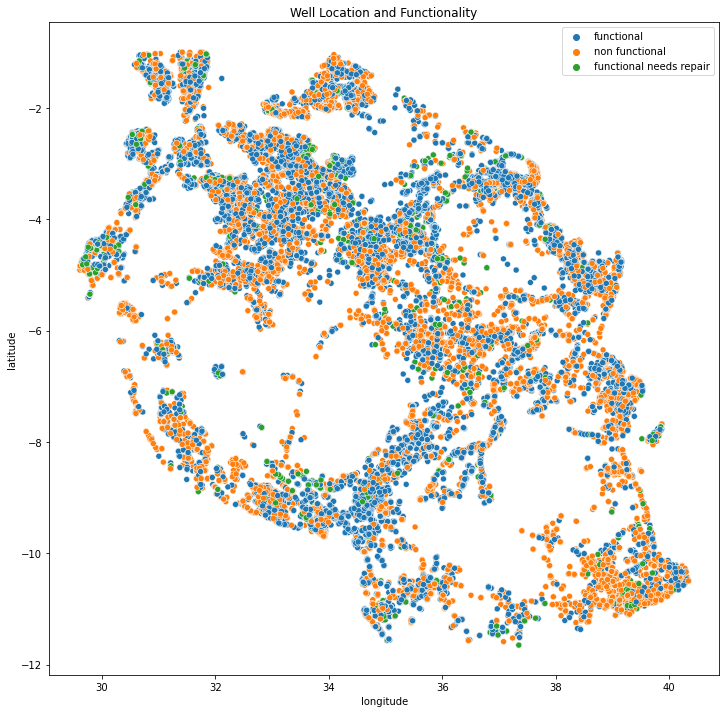

In [11]:
#Scatter plot showing the distribution of the wells and their status

fig, ax = plt.subplots(figsize=(12,12))
df = New_df[New_df['longitude'] != 0.0]
sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=df, ax=ax)
plt.title('Well Location and Functionality')
plt.legend(fancybox=True);

The wells seem to be evenly distributed across Tanzania. The region of around -11 lattitude and around 39 longitudes has the majority number of non- functional wells. Majority of the overall wells are situated on the upper half of the map

Construction year columns shows the year the well was constructed. The years range from 1966 to the year 2010. However, there are zero entries. Due to the wide range of years, I decided to group the years in decades and refered to the zero entries as unkown

In [12]:
#Value counts in the column construction year
New_df.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [13]:
# to change the construction year to numeric value
New_df.construction_year = pd.to_numeric(New_df.construction_year)

#conerting to better categories (decades) for better visualization & understanding
def construction_cl(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '1960s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '1970s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '1980s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '1990s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '2000s'
    elif row['construction_year'] >= 2010:
        return '2010s'
    else:
        return 'unknown'
    
New_df['construction_year'] = New_df.apply(lambda row: construction_cl(row), axis=1)

In [14]:
New_df.construction_year.value_counts()

unknown    20709
2000s      15330
1990s       7678
1980s       5578
2010s       5161
1970s       4406
1960s        538
Name: construction_year, dtype: int64

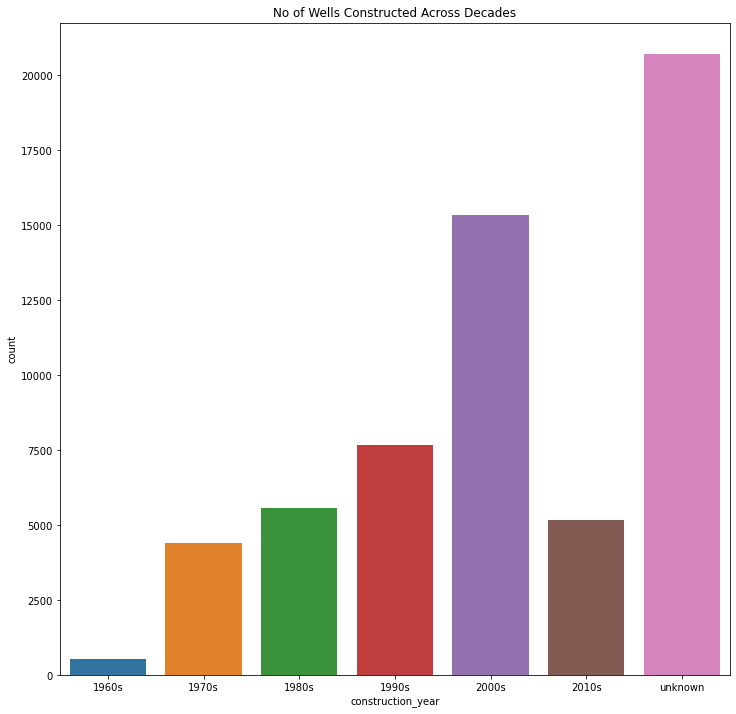

In [15]:
#Distribution of well by decades constructed

# Sort the construction years in ascending order
New_df_sorted = New_df.sort_values('construction_year')

plt.figure(figsize=(12, 12))
ax = sns.countplot(x='construction_year', data=New_df_sorted)
plt.title('No of Wells Constructed Across Decades')
plt.show()

Majority of the wells had no clear year of constuction(20,709 wells),followed by those constructed between 2000 to 2009 with a figure of 15,330 wells. The least number of wells ,538, were constructed between the year 1960 and 1969. There was a noticed trend of increase in number of wells by decades untill between the years 2010 to 2019 where a significant drop in number of wells constructed was observed.

Basin Column shows the geographic water basin under which our wells fall. The dataset is well filled as it lacks missing values and zero entries. The lake Victoria basin has the largest number of wells with a figure of 10,248 followed by Pangani and Rufiji which had 8940 and 7976 wells respectively. Lake Lukwa basin had the least number  with 2454 wells.

I observed that the region column and the extraction_type_class had no missing values and had no zero entries. Iringa region had the largest number of wells(5294), followed closely by Shinyanga and Mbeya regions which had 4982 and 4639. Dar es salaam region had the lowest number of wells(805). About 45% of the wells utilized gravity as their extraction type followed by 16456 wells that used hand-pumps, while wind powered wells had the lowest number of 117. 

In [16]:
New_df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

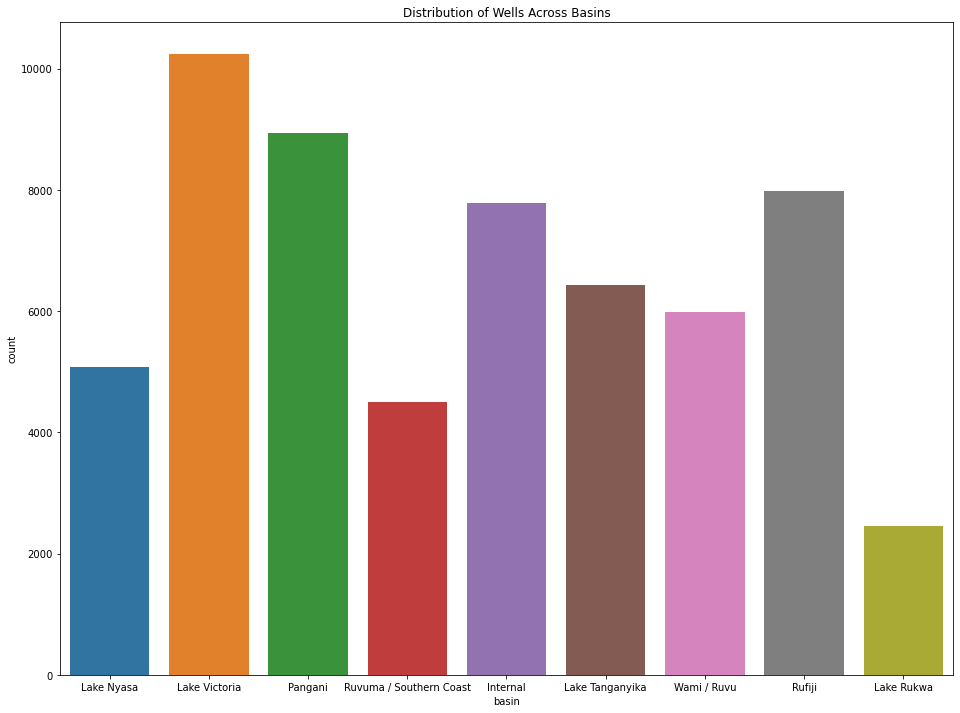

In [17]:
#graph showing the water basin
plt.figure(figsize=(16,12))
ax = sns.countplot(x='basin', data=New_df)
plt.title('Distribution of Wells Across Basins')
plt.show()

In [18]:
New_df.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

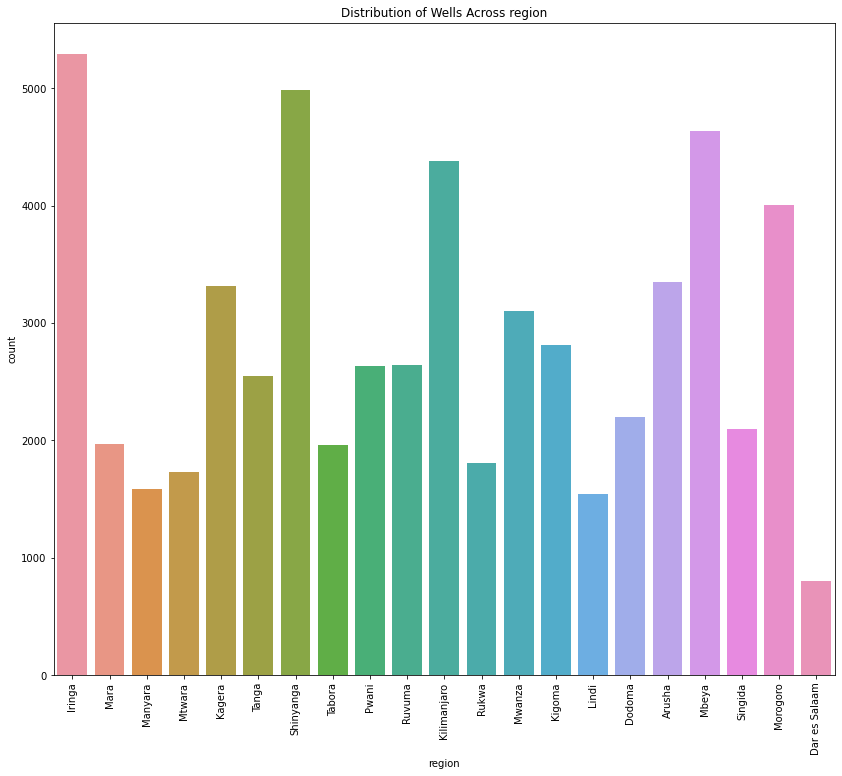

In [19]:
# Bar plot showing distribution of wells across regions
plt.figure(figsize=(14,12))
ax = sns.countplot(x='region', data=New_df)
plt.title('Distribution of Wells Across region')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [20]:
New_df.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

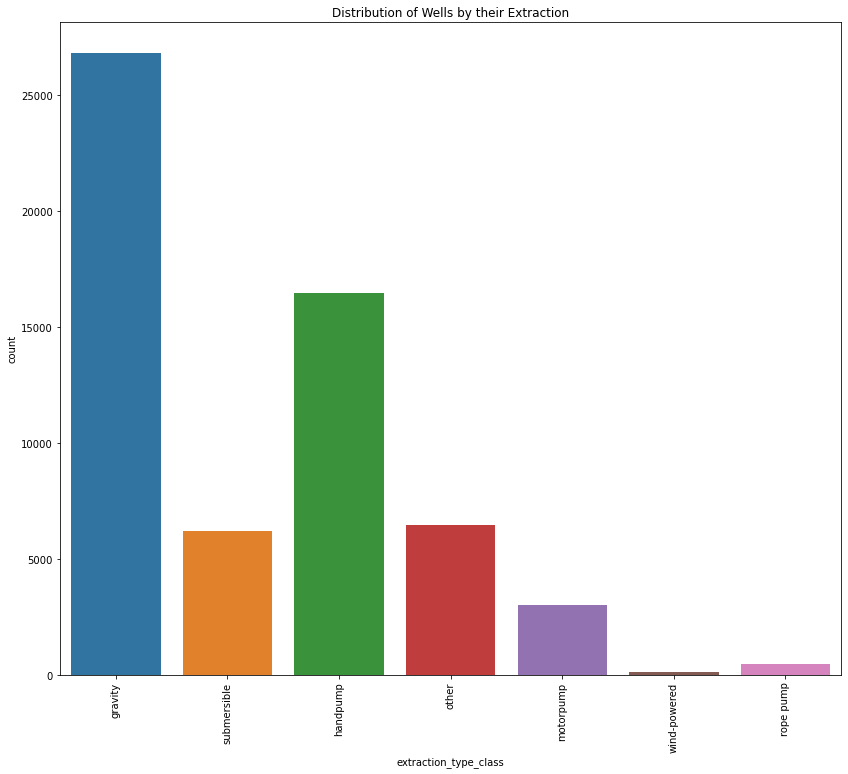

In [21]:
# Bar plot showing distribution of wells and their extraction types
plt.figure(figsize=(14,12))
ax = sns.countplot(x='extraction_type_class', data=New_df)
plt.title('Distribution of Wells by their Extraction')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Managent_group column refers to the group category that manages/oversee the wells. Various entities were managing the wells, which were user-groups which had the largest number of 52490,commercial and parastatals. There was a entries of Unknown and other ,which had the lowest number of 561 and 943 respectively, in the management group. I was intrested to see how management of the wells relate with its functionality and found out that in each category the most wells were functional,followed by the non-functional ones and the least being those that were functional but needed repairs. However in the unknown category the non-functional wells outnumbered the functional ones and lacked the wells that were functional but needed repairs.

In [22]:
#value counts of the scheme_mangement columns
New_df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

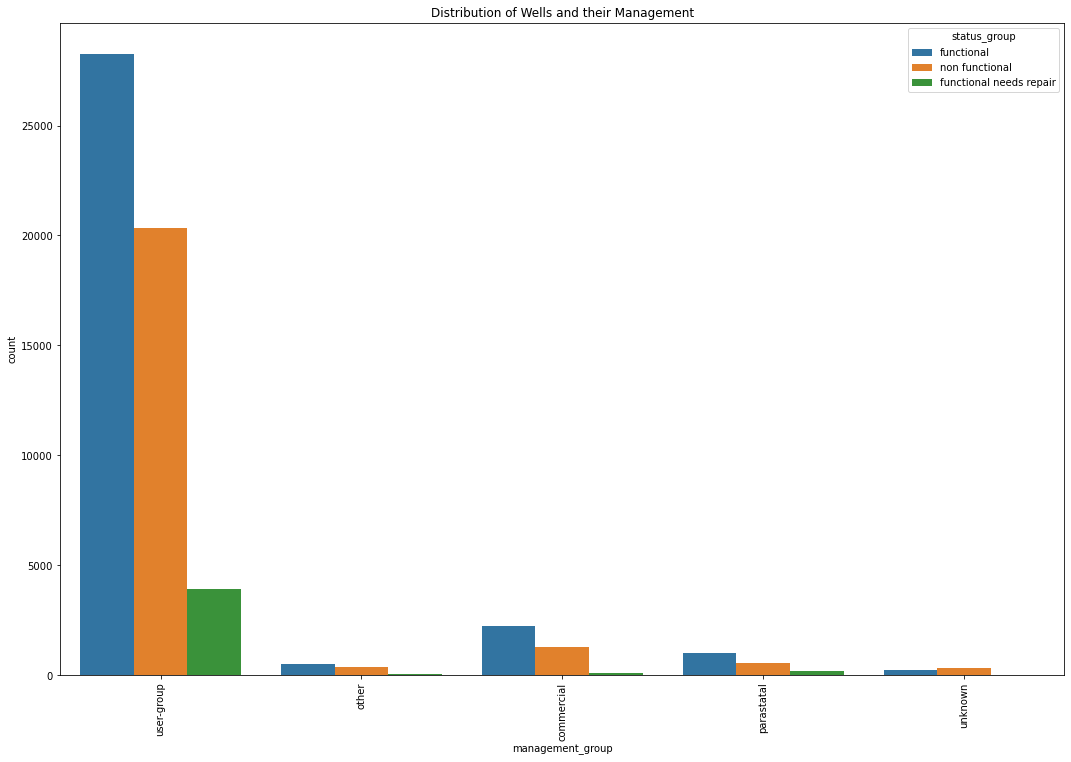

In [23]:
# Bar plot showing distribution of wells and their management
plt.figure(figsize=(18,12))
ax = sns.countplot(x='management_group',hue = 'status_group', data=New_df)
plt.title('Distribution of Wells and their Management')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

The payment column represent the payment mode adopted for the water well. Majority of the wells are free (25348) which is good initiative to ensure that many households have access to water. The wells whereby water is paid per bucket drawn and those paid monthly compose a big number of 8985 and 8300 respectively. The wells that the users pay annually and those with other payment modes compose the least population on 3642 and 1054 respectively.
Wells where people pay to draw water seem to be better managed and have the largest number of functional wells compared to wells that need repair. The wells that provide water for free and those that have their payment modes unknown have the non-functional wells exceeding the functional wells.

In [24]:
New_df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

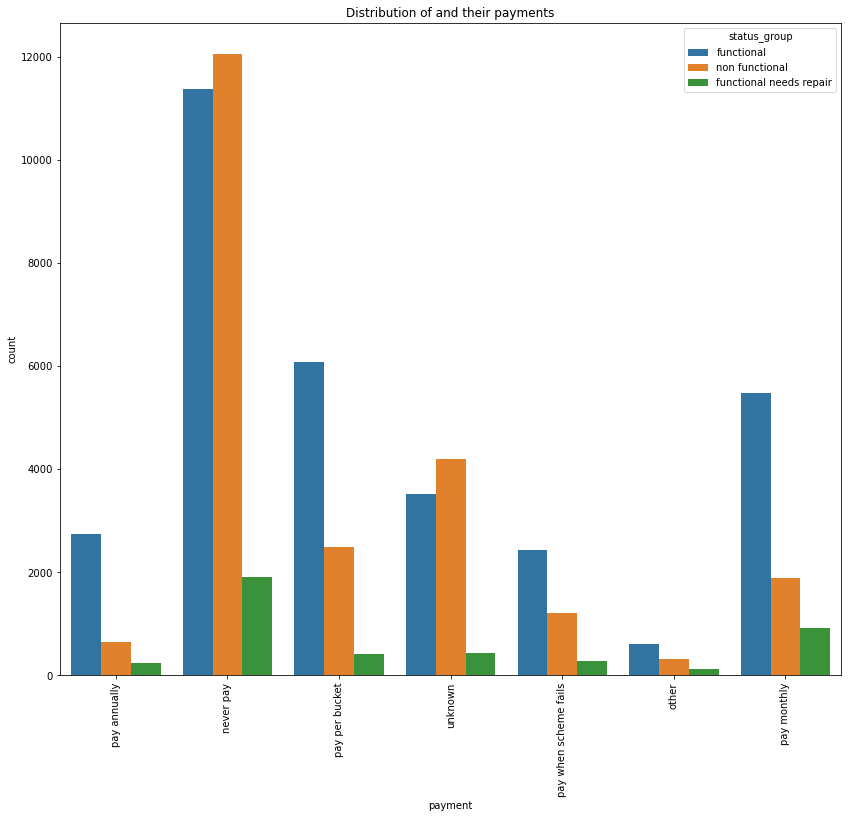

In [25]:
# Bar plot showing distribution of wells and their payments
plt.figure(figsize=(14,12))
ax = sns.countplot(x='payment',hue = 'status_group', data=New_df)
plt.title('Distribution of and their payments')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

The water quality of the wells have categories as shown in the following code cell. The soft water wells have the largest number of functioning wells and their ratio is significantly larger compared to those that need repair in the same category. The salty wells and those whose water quality is unknown have their non-functional number of pumps being more than those that are functional.

In [26]:
New_df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

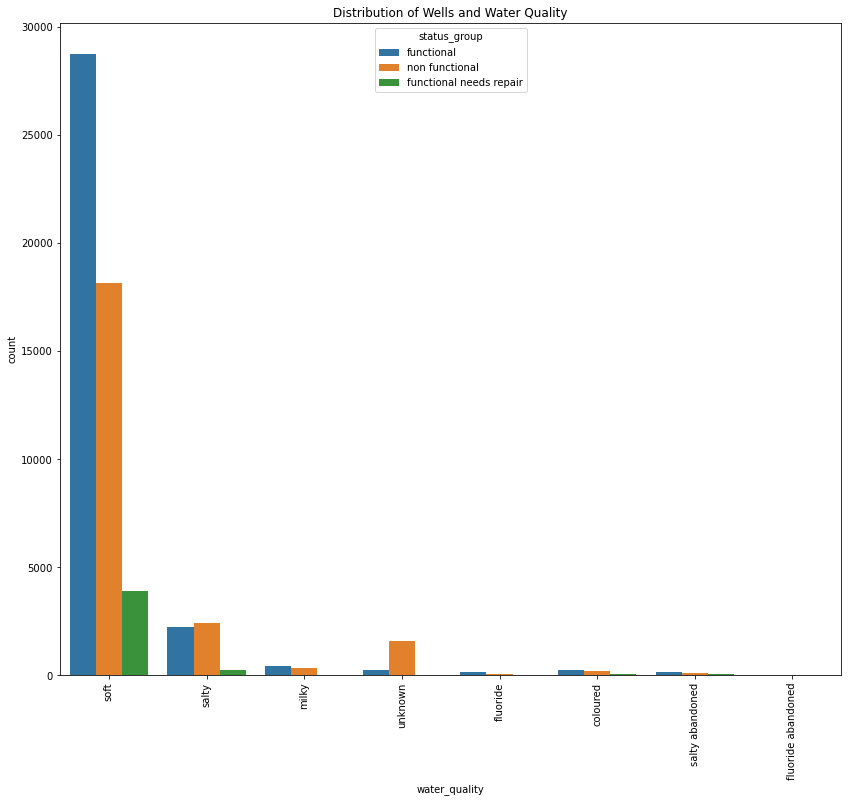

In [27]:
# Bar plot showing distribution of wells showing their water quality
plt.figure(figsize=(14,12))
ax = sns.countplot(x='water_quality',hue = 'status_group', data=New_df)
plt.title('Distribution of Wells and Water Quality')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

The "quantity_group" column indicates the water quantity within wells. The most prevalent category is "enough," with a total of 33,186 wells falling into this group. Within this category, functional wells are the most numerous. In contrast, the "dry" wells and those with an "unknown" quantity have a higher count of non-functional wells compared to the functional ones.

In [28]:
New_df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

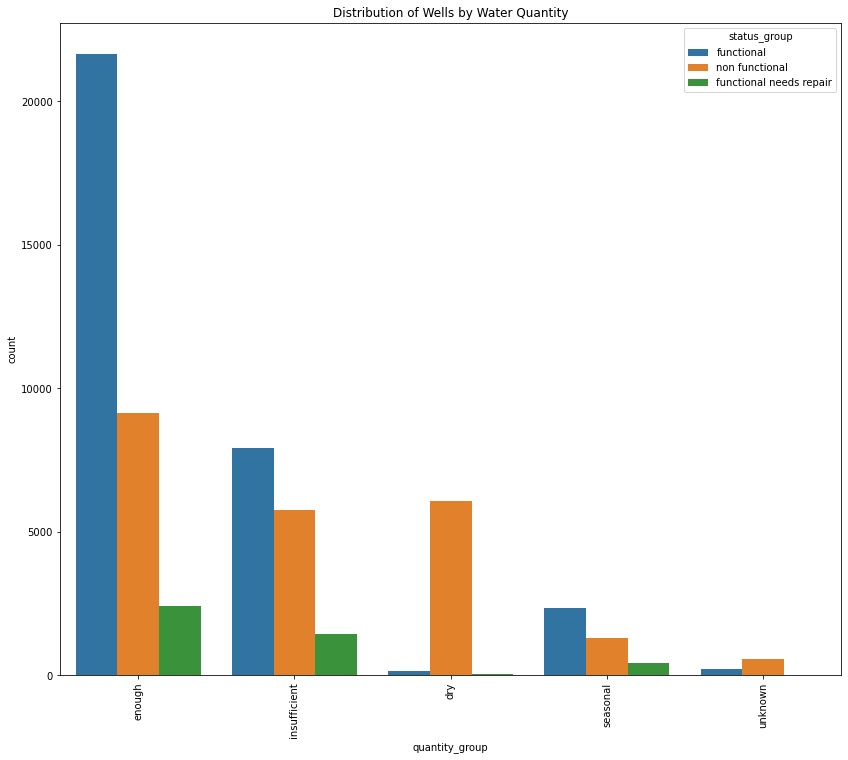

In [29]:
# Bar plot showing distribution of wells and water quantity
plt.figure(figsize=(14,12))
ax = sns.countplot(x='quantity_group',hue = 'status_group', data=New_df)
plt.title('Distribution of Wells by Water Quantity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

The "source_type" column categorizes the water source type for the wells in our dataset. Spring and shallow wells are the most prevalent sources, with 17,021 and 16,824 instances, respectively. Dams and other sources, in contrast, are the least common, with 656 and 278 instances, respectively. In most categories, functional wells are the most abundant, followed by non-functional wells, with the least number being those requiring repairs. However, for dams, the number of non-functional wells exceeds the number of functional ones.

In [30]:
New_df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

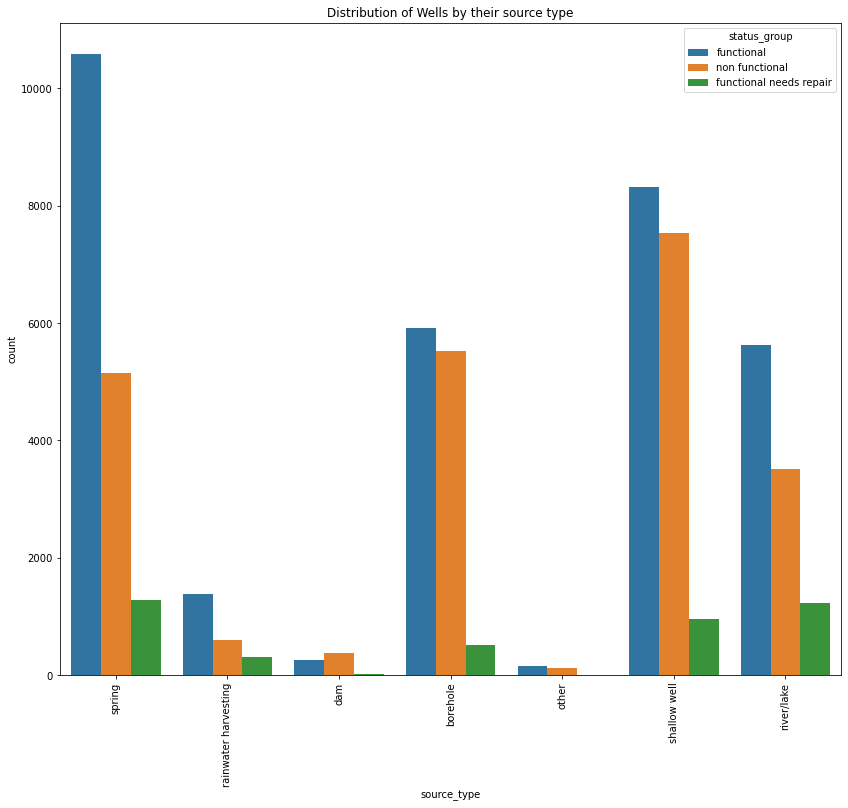

In [31]:
# Bar plot showing distribution of wells across and their water source type
plt.figure(figsize=(14,12))
ax = sns.countplot(x='source_type',hue = 'status_group', data=New_df)
plt.title('Distribution of Wells by their source type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

The source class column has three categories with their numbers as indicated in the code cell below. All the three categories have the functional wells being the highest compared to the non_functional and those that need repairs

In [32]:
New_df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

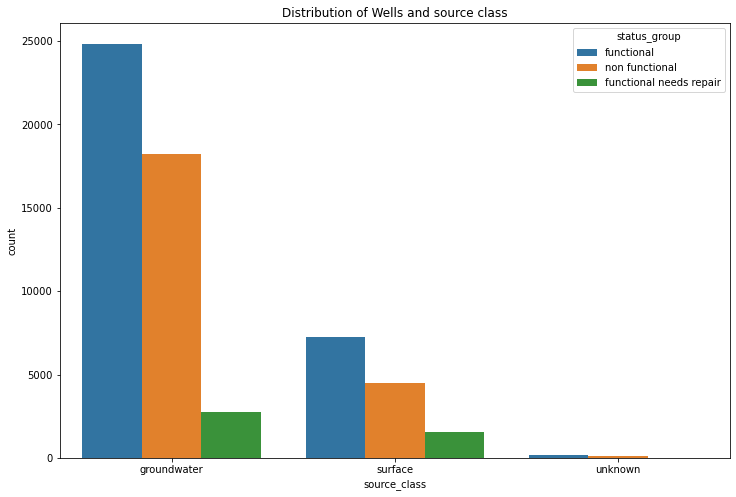

In [33]:
# Bar plot showing distribution of well and source class
plt.figure(figsize=(12,8))
ax = sns.countplot(x='source_class',hue = 'status_group', data=New_df)
plt.title('Distribution of Wells and source class')
plt.show()

The 'waterpoint type' column show type of water point each well utilizes. The communal standpipe category has the largest number. In this category, we have wells that have only one stand pipe(28,522 of them) and those that have multiple standpipes(6103 in number). Cattle trough and dams have the lowest number of 116 and 7 wells respectively. In the categories of communal standpipe,hand pump, improved spring and cattle trough the number of functional wells outnumber those of non-functional and those that need repair. In the category of communal stand pipe multiple and other the non-funtional wells were observed to have larger numbers than the functional wells.

In [34]:
New_df.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

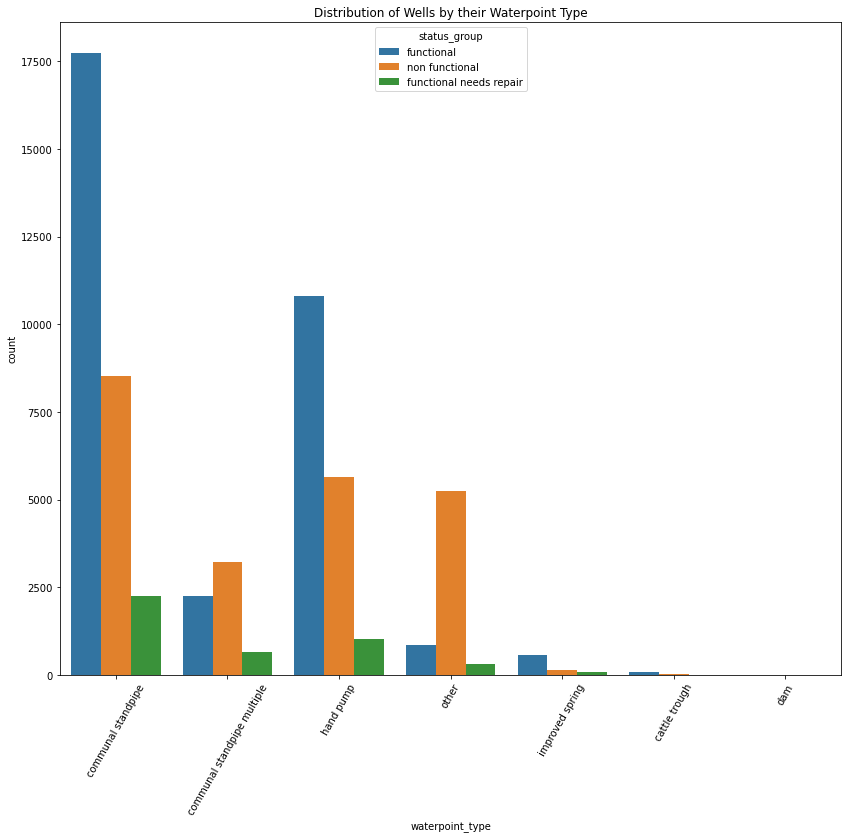

In [35]:
# Bar plot showing distribution of wells and their waterpoint type
plt.figure(figsize=(14,12))
ax = sns.countplot(x='waterpoint_type',hue = 'status_group', data=New_df)
plt.title('Distribution of Wells by their Waterpoint Type')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.show()

In [36]:
New_df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [37]:
#Merge the non functional and functional needs repair data in status_group column and rename it needs repair
New_df['status_group'].replace({'functional needs repair': 'needs repair', 'non functional': 'needs repair'}, inplace=True)


In [38]:
#check class balance

class_balance = New_df['status_group'].value_counts(normalize=True) * 100
print(class_balance)

functional      54.308081
needs repair    45.691919
Name: status_group, dtype: float64


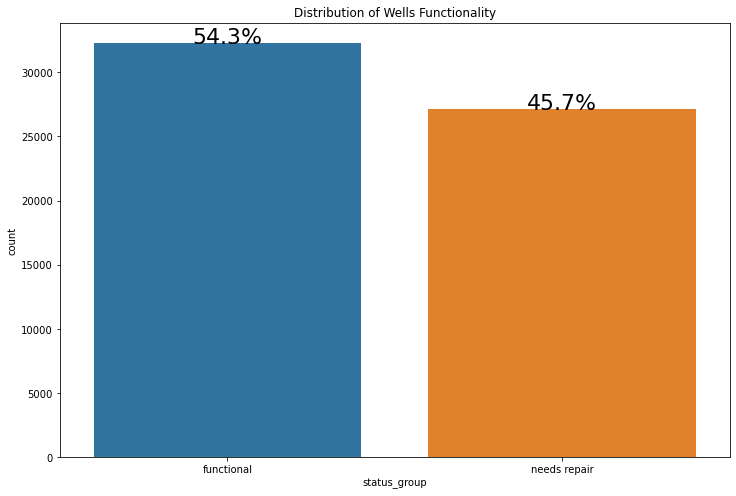

In [39]:
# Bar plot showing functionality of the wells
plt.figure(figsize=(12,8))
ax = sns.countplot(x='status_group', data=New_df)
plt.title('Distribution of Wells Functionality')

# Add the percentage on each bar
total = len(New_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center',fontsize = 22,)
plt.show()

The status_group represent the service status of the wells. The column has three categores of functional wells with a population of 32,259 , non-functional wells with 22824 wells and those that are functional but need repairs which were 4,317 in numbers. 

This category is my dependent category so I decided to merge the non-functional wells and the wells that were functional but needed repairs into one category of needs repair. This will be helpful when designing a prediction model and will be helpful to the stakeholders too as it will help them identify the wells that need repairs. This gave a 54.3% of functional well and 45.7% of need repair category. The margin is 8.6% and I felt the class was well balanced and hence no need for generating synthetic samples.

the New_df now has 59400 rows which have non-null values

In [40]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             59400 non-null  int64  
 1   population             59400 non-null  float64
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   construction_year      59400 non-null  object 
 5   basin                  59400 non-null  object 
 6   region                 59400 non-null  object 
 7   extraction_type_class  59400 non-null  object 
 8   management_group       59400 non-null  object 
 9   payment                59400 non-null  object 
 10  water_quality          59400 non-null  object 
 11  quantity_group         59400 non-null  object 
 12  source_type            59400 non-null  object 
 13  source_class           59400 non-null  object 
 14  waterpoint_type        59400 non-null  object 
 15  st

### Feature selection
The next step is selecting the feature that will be used in modeling. The gps_height,longitude and latitude columns bear no significance on the functionality of the wells. I will drop them and rename my dataframe

In [41]:
# Create a  df after dropping 'gps_height', 'longitude', 'latitude' columns
My_df = New_df.drop(['gps_height', 'longitude', 'latitude'], axis=1)

# Display the first few rows of the trial DataFrame
My_df.head()

,population,construction_year,basin,region,extraction_type_class,management_group,payment,water_quality,quantity_group,source_type,source_class,waterpoint_type,status_group
0,109.0,1990s,Lake Nyasa,Iringa,gravity,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional
1,280.0,2010s,Lake Victoria,Mara,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,250.0,2000s,Pangani,Manyara,gravity,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,58.0,1980s,Ruvuma / Southern Coast,Mtwara,submersible,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,needs repair
4,150.0,unknown,Lake Victoria,Kagera,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


From my dataset I defined my dependent variable and the independent variables in preparation for a machine learning model, with X representing the input features and y representing the output labels that the model will predict.
I then transformed the y variable(status_group) into numeric data to be used in machine learning algorithms that require numerical labels
I will also encode categorical features in the variable X using one-hot encoding then split the data to training and testing data using train_test_split.

In [42]:
#Define the X and y variables
X = My_df.drop('status_group', axis=1)  
y = My_df['status_group']

In [43]:
# Transform the target variable into integers
label = LabelEncoder()
y_transformed = label.fit_transform(y)

In [44]:
#get dummies for the X variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Display the first few rows of the encoded DataFrame
X_encoded.head()

,population,construction_year_1970s,construction_year_1980s,construction_year_1990s,construction_year_2000s,construction_year_2010s,construction_year_unknown,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,...,source_type_shallow well,source_type_spring,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,109.0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1,280.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,250.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,58.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,150.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [45]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y_transformed,test_size=0.2,random_state=42)

### Baseline Model


In [46]:
#Baseline model

# Create and fit a dummy classifier
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dummy_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the baseline model: {accuracy:.4f}")

# Generate a classification report for the baseline model
class_report = classification_report(y_test, y_pred, target_names=label.classes_)
print(class_report)

Accuracy of the baseline model: 0.5435
              precision    recall  f1-score   support

  functional       0.54      1.00      0.70      6457
needs repair       0.00      0.00      0.00      5423

    accuracy                           0.54     11880
   macro avg       0.27      0.50      0.35     11880
weighted avg       0.30      0.54      0.38     11880



C:\Users\pavilion14\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavilion14\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavilion14\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [47]:

# Perform cross-validation for the baseline model
cv_scores = cross_val_score(dummy_classifier, X_encoded, y_transformed, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-Validation Scores (Accuracy): {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.2f}")

Cross-Validation Scores (Accuracy): [0.54309764 0.54309764 0.54309764 0.54309764 0.54301347]
Mean Accuracy: 0.5431
Standard Deviation of Accuracy: 0.00


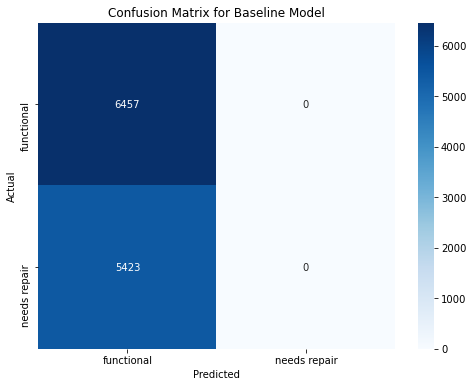

In [48]:

# Evaluate the baseline model and draw a confusion matrix heatmap
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label.classes_, yticklabels=label.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Baseline Model')
plt.show()

The Baseline model has an accuracy of 54%. A cross validation on the model gave a mean accuracy of 54.3%. The confusion matrix highlights that our baseline model excels at correctly recognizing the positive class but it faces challenges when it comes to correctly predicting the presence of the Negative class. The absence of true negative raises concerns, suggesting that the model struggles to effectively capture instances of the negative class in this specific evaluation.


### KNN model

In [49]:
#KNN model
# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of the KNN model: {accuracy_knn:.4f}")

# Generate a classification report for the KNN model
class_report_knn = classification_report(y_test, y_pred_knn, target_names=label.classes_)
print(class_report_knn)



Accuracy of the KNN model: 0.7322
              precision    recall  f1-score   support

  functional       0.74      0.79      0.76      6457
needs repair       0.73      0.66      0.69      5423

    accuracy                           0.73     11880
   macro avg       0.73      0.73      0.73     11880
weighted avg       0.73      0.73      0.73     11880



In [50]:
# Perform cross-validation for the KNN model
cv_scores_knn = cross_val_score(knn_classifier, X_encoded, y_transformed, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-Validation Scores (Accuracy) for KNN: {cv_scores_knn}")
print(f"Mean Accuracy for KNN: {cv_scores_knn.mean():.4f}")
print(f"Standard Deviation of Accuracy for KNN: {cv_scores_knn.std():.2f}")

Cross-Validation Scores (Accuracy) for KNN: [0.73585859 0.73324916 0.73350168 0.73341751 0.72693603]
Mean Accuracy for KNN: 0.7326
Standard Deviation of Accuracy for KNN: 0.00


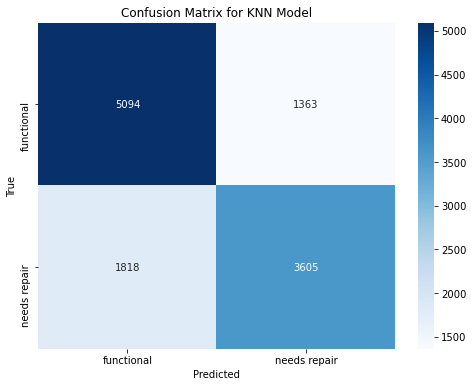

In [51]:
#confusion matrix for the knn model and plot the heatmap

# Import the confusion_matrix function
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the KNN model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label.classes_, yticklabels=label.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN Model')
plt.show()

The KNN model has an accuracy of 73% and a cross validation mean accuract of 73.2%. This is a significant improvement as compared to the baseline model. The confusion matrix is way better in predicting both positives and negatives classes with the true positive predictions leading (5094) followed by True negatives(3605)


### Decision Tree model

In [52]:
#Decision Tree model
# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.4f}")

# Generate a classification report for the Decision Tree model
class_report = classification_report(y_test, y_pred, target_names=label.classes_)
print(class_report)



Accuracy of the Decision Tree model: 0.7715
              precision    recall  f1-score   support

  functional       0.77      0.83      0.80      6457
needs repair       0.78      0.70      0.74      5423

    accuracy                           0.77     11880
   macro avg       0.77      0.77      0.77     11880
weighted avg       0.77      0.77      0.77     11880



In [53]:
# Perform cross-validation for the Decision Tree model
cv_scores = cross_val_score(decision_tree_classifier, X_encoded, y_transformed, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-Validation Scores (Accuracy): {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.2f}")

Cross-Validation Scores (Accuracy): [0.77659933 0.76860269 0.77188552 0.76691919 0.76683502]
Mean Accuracy: 0.7702
Standard Deviation of Accuracy: 0.00


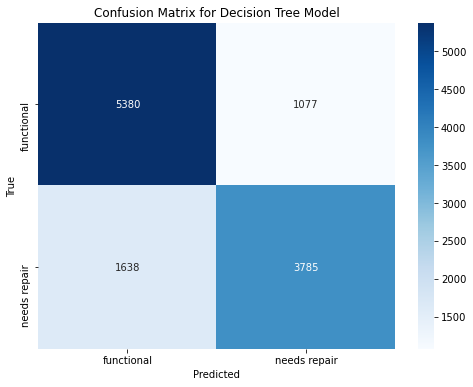

In [54]:
#confusion matrix for the decision tree model

# Generate the confusion matrix for the Decision Tree model
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', xticklabels=label.classes_, yticklabels=label.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

The Decision Tree Model has an accuracy of 77% and its crossvalidation mean Acuuracy is 77.02%. The confusion matrix has improved compared to our Knn model

### Random Forest Classifier

In [55]:
#Random Class Clasifier
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the model evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      6457
           1       0.79      0.72      0.75      5423

    accuracy                           0.78     11880
   macro avg       0.78      0.78      0.78     11880
weighted avg       0.78      0.78      0.78     11880



In [56]:
#cross validate the model
# Cross validate the model
#from sklearn.model_selection import cross_val_score

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_encoded, y_transformed, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4}")

Cross-Validation Scores: [0.78653199 0.77979798 0.78358586 0.78274411 0.78005051]
Mean CV Accuracy: 0.7825


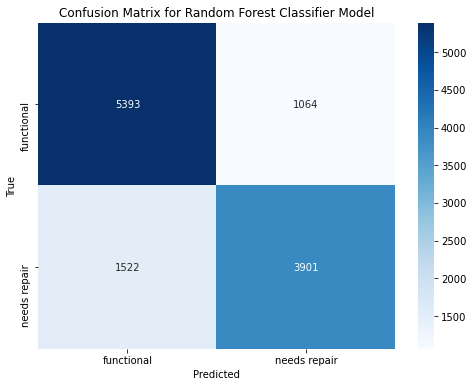

In [57]:
#confusion matrix for random forest classifier
# Generate the confusion matrix for the Random Forest Classifier model
conf_matrix_random_forest = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Blues', xticklabels=label.classes_, yticklabels=label.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Classifier Model')
plt.show()

The Random Forest Classifier gave an accuracy of 78% and a cross validation Accuracy mean of 78.25%. The model also exhibited improved confussion matrix compared to our other models. Tuning the model using GridSearchCV gave our model an accuracy of 80%


In [60]:
# Tune the Random Forest classifier

from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set using the tuned model
y_pred_tuned = best_rf_classifier.predict(X_test)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned)

# Print the results
print("Best Hyperparameters:", best_params)
print(f"Tuned Model Accuracy: {accuracy_tuned:.2f}")
print("Classification Report for Tuned Model:\n", report_tuned)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Model Accuracy: 0.80
Classification Report for Tuned Model:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82      6457
           1       0.82      0.71      0.76      5423

    accuracy                           0.80     11880
   macro avg       0.80      0.79      0.79     11880
weighted avg       0.80      0.80      0.79     11880



I calculated the feauture importance from our tuned model to understand indicates how each feature contributes to the model prediction. Population, quantity_group_enough and waterpoint_type_other were the top three contributing features in our model

In [61]:

# Calculate feature importances from the best_rf_classifier
feature_importances = best_rf_classifier.feature_importances_

# Sort the feature importances in descending order
sorted_feature_importances = sorted(zip(feature_importances, X_train.columns), reverse=True)

# Print the feature importances
for importance, feature in sorted_feature_importances:
    print(f"{feature}: {importance:.4f}")

population: 0.1044
quantity_group_enough: 0.0917
waterpoint_type_other: 0.0681
extraction_type_class_other: 0.0594
quantity_group_insufficient: 0.0493
payment_pay per bucket: 0.0265
quantity_group_seasonal: 0.0242
waterpoint_type_communal standpipe: 0.0240
construction_year_2010s: 0.0222
waterpoint_type_communal standpipe multiple: 0.0212
region_Iringa: 0.0207
construction_year_2000s: 0.0200
construction_year_1970s: 0.0190
source_type_spring: 0.0175
management_group_user-group: 0.0170
payment_pay monthly: 0.0157
extraction_type_class_handpump: 0.0154
water_quality_unknown: 0.0151
payment_unknown: 0.0151
source_type_shallow well: 0.0146
extraction_type_class_submersible: 0.0130
payment_pay annually: 0.0123
source_class_surface: 0.0121
waterpoint_type_hand pump: 0.0120
water_quality_soft: 0.0116
construction_year_1980s: 0.0114
basin_Lake Victoria: 0.0108
construction_year_1990s: 0.0107
basin_Pangani: 0.0106
source_type_river/lake: 0.0101
construction_year_unknown: 0.0098
basin_Lake Rukwa

### Recommendations

Based on the project findings, the following recommendations can be made:

- Prioritize Soft Water Wells: The data analysis reveals that wells with soft water tend to have a higher rate of functionality. It is advisable to invest in tools and technologies for assessing the water quality of potential well sites before construction. When water quality is determined to be suitable, prioritize the construction of soft water wells. This will contribute to the overall functionality and reliability of water sources.

- Implement Payment Plans: The data shows that wells where users pay for water have a better track record of maintenance and functionality. To ensure sustainability, consider introducing payment plans for newly constructed wells, even if the charges are minimal. The revenue generated can be used for regular maintenance and servicing, promoting the long-term functionality of the wells.

- User Group Management: Wells managed by user groups consistently exhibit higher rates of serviceability. It is recommended to involve and empower local user groups in the management of wells. This community-driven approach can lead to more well-maintained and operational water sources, fostering a sense of ownership and responsibility among the users.

- Ensure Sufficient Water Quantity: The data underscores that wells with enough water quantity are more likely to be functional. Therefore, prioritize the construction of wells that guarantee an adequate water supply. This will meet the essential water needs of the population and reduce instances of non-functional wells.

- Invest in Ground Water and Communal Stand Pipes: Groundwater and Communal Stand Pipe wells consistently demonstrate higher functionality rates. Consider allocating resources to the construction and maintenance of these types of wells to ensure a more reliable and ample water supply for the residents of Tanzania.

- Utilize the RandomForestClassifier Model: In terms of predictive modeling, the RandomForestClassifier has proven to be the most effective with an accuracy rate of 80% after tuning. Continue to utilize this model to assess well conditions and prioritize maintenance and repair efforts. This model can provide valuable insights for decision-making related to well management and resource allocation.

By implementing these recommendations, you can enhance the reliability and accessibility of clean water sources in Tanzania, leading to improved living conditions and public health.

### Conclusion
In conclusion, the findings from our project shed light on critical insights into the management and construction of water wells in Tanzania. These recommendations are derived from a comprehensive analysis of well conditions, user dynamics, and predictive modeling, all aimed at improving the availability and functionality of water sources.

- Water Quality Assessment: Prioritizing the construction of wells with soft water, following rigorous assessments of water quality, is an essential step. This will contribute to the reliability and functionality of water sources, ensuring cleaner and safer water access for the population.

- Sustainability through Payments: Introducing payment plans, no matter how modest, for well usage can significantly enhance maintenance efforts. User contributions can fund regular servicing and repairs, ensuring that wells remain functional over time.

- Community Involvement: Entrusting well management to user groups has shown a consistent positive impact on functionality. Empowering local communities to oversee the maintenance and operation of wells fosters a sense of responsibility and ownership, leading to well-maintained water sources.

- Adequate Water Quantity: Constructing wells that guarantee a sufficient water supply is vital. Adequate water quantity ensures that the wells meet the fundamental water needs of the population, reducing instances of non-functional wells.

- Invest in Groundwater and Communal Stand Pipes: Prioritizing the construction and maintenance of groundwater and Communal Stand Pipe wells is a strategic investment. These types of wells have demonstrated higher functionality rates and should be a focus for providing a consistent and ample water supply to Tanzanian residents.

- Effective Predictive Modeling: The RandomForestClassifier model, with an 80% accuracy rate after tuning, proves to be a valuable tool for assessing well conditions. Utilize this model for data-driven decision-making regarding well management, repair prioritization, and resource allocation.

These recommendations collectively aim to enhance the availability of clean and reliable water sources, ultimately improving the quality of life, public health, and overall well-being of the population in Tanzania. By implementing these insights, we can work towards a sustainable and resilient water infrastructure, ensuring that clean water remains accessible to all.




